In [154]:
# Connecting google drive with colab notebook
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [155]:
# import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
# load csv

df = pd.read_csv('/content/gdrive/MyDrive/dataset.csv')

In [157]:
df.head()

event_time             order_id  ...   price       user_id
0  2020-04-24 11:50:39 UTC  2294359932054536986  ...  162.01  1.515916e+18
1  2020-04-24 11:50:39 UTC  2294359932054536986  ...  162.01  1.515916e+18
2  2020-04-24 14:37:43 UTC  2294444024058086220  ...   77.52  1.515916e+18
3  2020-04-24 14:37:43 UTC  2294444024058086220  ...   77.52  1.515916e+18
4  2020-04-24 19:16:21 UTC  2294584263154074236  ...  217.57  1.515916e+18

[5 rows x 8 columns]

In [158]:
df = df.dropna()

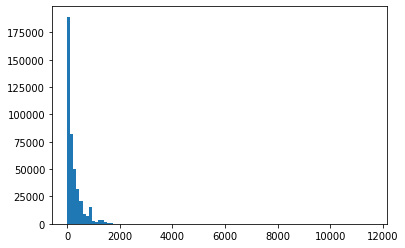

In [159]:
# histogram of price
plt.hist(df['price'], bins = 100)
plt.show()

In [160]:
# creating new column time_hours

df['time_hours'] = pd.to_numeric(df['event_time'].str[-12:13])

In [161]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [162]:
# creating column weekday
df['weekday'] = pd.to_numeric(df['event_time'].dt.dayofweek)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420718 entries, 0 to 2633520
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     420718 non-null  datetime64[ns, UTC]
 1   order_id       420718 non-null  int64              
 2   product_id     420718 non-null  int64              
 3   category_id    420718 non-null  float64            
 4   category_code  420718 non-null  object             
 5   brand          420718 non-null  object             
 6   price          420718 non-null  float64            
 7   user_id        420718 non-null  float64            
 8   time_hours     420718 non-null  int64              
 9   weekday        420718 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(4), object(2)
memory usage: 35.3+ MB


In [194]:
# brand had the most sales volume

df.groupby(["brand"]).count().sort_values('price',ascending=False).head(1)

event_time  order_id  product_id  ...  time_hours  weekday   year
brand                                      ...                            
samsung       89988     89988       89988  ...       89988    89988  89988

[1 rows x 10 columns]

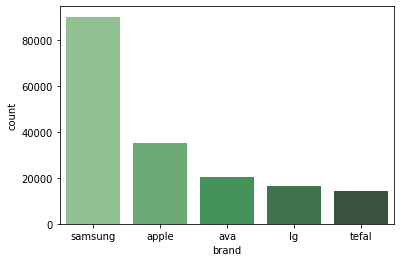

In [164]:
# Plot a graph of the top 5 brands comparing their sales volume.

sns.countplot(x="brand", data=df, palette="Greens_d",
              order=df.brand.value_counts().iloc[:5].index)

In [165]:
sc = df.groupby('category_code')['price'].agg(['sum','count'])

In [166]:
# category with highest average price

(sc['sum']/sc['count']).sort_values(ascending=False).head(1)

category_code
electronics.camera.video    670.243985
dtype: float64

In [167]:
fil = df.loc[(df['price'] < 20)]

In [168]:
fil = fil[['category_code','brand','price']]

In [169]:
# category has most sales value under price 20

fil.groupby(["category_code"]).count().sort_values('price',ascending=False).head(1)

brand  price
category_code                            
computers.peripherals.mouse   6479   6479

In [170]:
# brand has most sales value under price 20

fil.groupby(["brand"]).count().sort_values('price',ascending=False).head(1)

category_code  price
brand                      
ava             7041   7041

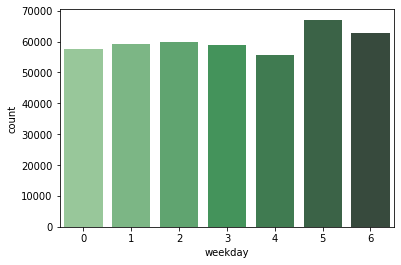

In [171]:
# Write a function that plots the distribution of the sales volume over the weekdays.

sns.countplot(x="weekday", data=df, palette="Greens_d")

In [172]:
df['year'] = pd.DatetimeIndex(df['event_time']).year

In [173]:
df['year']=pd.to_numeric(df['year'])

In [174]:
# Write a function with two inputs, X and Y, that calculates the total cost of sales volume of category X in year Y.

def yc(x,y):

  result = df[df['year']==x][df['category_code']==y]['price'].sum()
  return result



In [175]:
yc(2020,"electronics.audio.headphone")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


1655295.71

In [270]:
# Write a function with two inputs, X and Y, that calculates the probability for the purchase of an item of brand X to cost more than Y currency units.

def bp(x,y):
  result = df[df['category_code']==x]['price']
  a = result[result > y]
  b = a.count()/result.count()
  return b


In [275]:
bp("electronics.audio.headphone",4)

0.99419338550871